In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from dtreeplt import dtreeplt

data = pd.read_csv("data/customerChurn.csv")

In [ ]:
data.head()

In [ ]:
X = data[['Frequency', 'Recency']]
y = data['Churn']

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X, y)

In [ ]:
dtree = dtreeplt(
    model=tree,
    feature_names=X.columns,
    target_names=['Yes', 'No']
    )
fig = dtree.view()

In [ ]:
import matplotlib.pyplot as plt

X['predict'] = tree.predict(X)

X_YES = X[X['predict']=='Yes'].copy()
X_NO = X[X['predict']=='No'].copy()
plt.plot(X_YES['Frequency'], X_YES['Recency'], 'bo')
plt.plot(X_NO['Frequency'], X_NO['Recency'], 'ro')
plt.xlabel('Purchase Frequency')
plt.ylabel('Purchase Recency')

### max_depth 제약 해제 

In [ ]:
X = X.drop(['predict'], axis=1)

tree = DecisionTreeClassifier()
tree.fit(X, y)

dtree = dtreeplt(
    model=tree,
    feature_names=X.columns,
    target_names=['Yes', 'No']
    )
fig = dtree.view()

In [ ]:
X['predict'] = tree.predict(X)

X_YES = X[X['predict']=='Yes'].copy()
X_NO = X[X['predict']=='No'].copy()
plt.plot(X_YES['Frequency'], X_YES['Recency'], 'bo')
plt.plot(X_NO['Frequency'], X_NO['Recency'], 'ro')
plt.xlabel('Purchase Frequency')
plt.ylabel('Purchase Recency')

### 규제에 따른 성과 측정 

In [ ]:
X = data.drop(['sex', 'Churn'], axis=1)
y = data['Churn']

In [ ]:
from sklearn.model_selection import cross_val_score

tree4 = DecisionTreeClassifier(max_depth=4)
scores4 = cross_val_score(tree4, X, y, scoring='roc_auc', cv=5)

print("AUC of decision tree with max_depth = 4: {:.3f}".format(scores4.mean()))

In [ ]:
tree = DecisionTreeClassifier()
scores = cross_val_score(tree, X, y, scoring='roc_auc', cv=5)

print("AUC of decision tree : {:.3f}".format(scores.mean()))

In [ ]:
X = data.drop(['sex', 'Churn'], axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X_train, y_train)

print("학습 집합 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 집합 정확도: {:.3f}".format(tree.score(X_test, y_test)))

In [ ]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
tree.fit(X_train, y_train)

print("학습 집합 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 집합 정확도: {:.3f}".format(tree.score(X_test, y_test)))

## 변수 중요도 측정

In [ ]:
print("입력 변수 중요도:\n{}".format(tree.feature_importances_))

In [ ]:
import matplotlib.pyplot as plt

def plot_feature_importances(model):
    n_features = model.feature_importances_.shape[0]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature Importances")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

plot_feature_importances(tree)

## 회귀 

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

movie = pd.read_csv('data/MoviePerformance.csv')
movie2 = movie[movie['ScreenFirst'] > 500]

X = movie2[['ScreenFirst', 'BoxOfficeFirst', 'Rating', 'Users']]
y = movie2['BoxOffice']

tree_reg = DecisionTreeRegressor()

scores = cross_val_score(tree_reg, X, y, scoring='neg_mean_absolute_error', cv=5)
scores.mean()

In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X, y)

export_graphviz(
        tree_reg,
        out_file="regression_tree.dot",
        feature_names=X.columns,
        rounded=True,
        filled=True
    )

In [ ]:
Source.from_file("regression_tree.dot")

## 범주형 변수 인코딩 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from dtreeplt import dtreeplt

data = pd.read_csv("data/customerChurn.csv")

In [ ]:
data.head()

In [ ]:
data['gender'] = data['sex'].replace({'M':0, 'F':1})
data.head()

In [ ]:
data['gender2'] = (data['sex'] == 'F').astype(np.int)
data.head()

In [ ]:
data.describe()

In [ ]:
data['Mcode'] = ['L' if x <= 206468 else 'H' if x > 1022440
	else 'M' for x in data['Monetary']]
data.Mcode.value_counts()

In [ ]:
data.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['Mcode_ord'] = label_encoder.fit_transform(data['Mcode'])

data.head()

In [ ]:
data.tail()

In [ ]:
ord = {'H':2,'M':1,'L':0}

data['Mcode_ord_2'] = data.Mcode.map(ord)

data.head()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
data['Mcode_ord_3'] = ordinal_encoder.fit_transform(data.Mcode.values.reshape(-1,1))
data.head()

In [ ]:
X = data.drop(['Churn'], axis=1)
y = data['Churn']
X_ohe = pd.get_dummies(X)
X_ohe.head()

In [ ]:
X = data.drop(['Churn'], axis=1)
y = data['Churn']
X_ohe = pd.get_dummies(X,drop_first=True)
X_ohe.head()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()
ohe = ohc.fit_transform(data.Mcode.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(ohe, columns = ["Mcode_" + str(ohc.categories_[0][i])
                                       for i in range(len(ohc.categories_[0]))])
data = pd.concat([data, dfOneHot], axis=1)
data.head()

In [ ]:
X = data.drop(['sex','Churn','gender2','Monetary','Mcode','Mcode_ord','Mcode_ord_2','Mcode_ord_3'], axis=1)
y = data['Churn']

In [ ]:
X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size = 0.2)

tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X_train, y_train)

print("학습 집합 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 집합 정확도: {:.3f}".format(tree.score(X_test, y_test)))

In [ ]:
def plot_feature_importances(model):
    n_features = model.feature_importances_.shape[0]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature Importances")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

In [ ]:
import matplotlib.pyplot as plt

plot_feature_importances(tree)

## 연습문제 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
churn = pd.read_csv('data/Churn_Modelling.csv')

churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


RowNumber : Row Numbers from 1 to 10000

CustomerId : Unique Ids for bank customer identification

Surname: Customer's last name

CreditScore : Credit score of the customer

Geography : The country from which the customer belongs

Gender : Male or Female

Age : Age of the customer

Tenure : Number of years for which the customer has been with the bank

Balance : Bank balance of the customer

NumOfProducts : Number of bank products the customer is utilising

HasCrCard : Binary Flag for whether the customer holds a credit card with the bank or not

IsActiveMember : Binary Flag for whether the customer is an active member with the bank or not

EstimatedSalary : Estimated salary of the customer in Dollars

Exited : Binary flag 1 if the customer closed account with bank and 0 if the customer is retained 

### Exited가 종속변수이며 수치형 변수와 범주형 변수가 있음

In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
churn.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [5]:
churn.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [6]:
X = churn.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
y = churn['Exited']

In [7]:
X_ohe = pd.get_dummies(X)
X_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size = 0.2)

tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X_train, y_train)

print("학습 집합 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 집합 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습 집합 정확도: 1.000
테스트 집합 정확도: 0.795


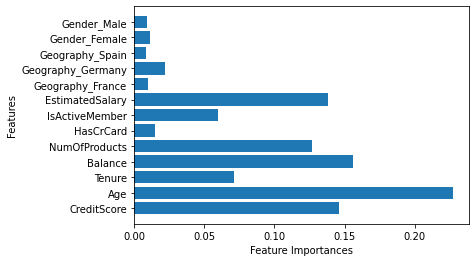

In [9]:
def plot_feature_importances(model):
    n_features = model.feature_importances_.shape[0]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_ohe.columns)
    plt.xlabel("Feature Importances")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

plot_feature_importances(tree)

### 불순도 계산 방안의 차이

In [10]:
tree_cv = DecisionTreeClassifier(criterion='entropy')

scores = cross_val_score(tree_cv, X_ohe, y, scoring='roc_auc', cv=5)
scores.mean()

0.6914259089319963

In [11]:
tree_cv = DecisionTreeClassifier(criterion='gini')

scores = cross_val_score(tree_cv, X_ohe, y, scoring='roc_auc', cv=5)
scores.mean()

0.6926802856627704

### 규제

In [12]:
score_list = []
I = range(2,11)

for i in I:
    tree_cv = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    scores = cross_val_score(tree_cv, X_ohe, y, scoring='roc_auc', cv=5)
    score_list.append(scores.mean())
    print("AUC score with max_depth {}: {:.3f}".format(i,scores.mean()))

AUC score with max_depth 2: 0.744
AUC score with max_depth 3: 0.795
AUC score with max_depth 4: 0.816
AUC score with max_depth 5: 0.836
AUC score with max_depth 6: 0.840
AUC score with max_depth 7: 0.840
AUC score with max_depth 8: 0.827
AUC score with max_depth 9: 0.811
AUC score with max_depth 10: 0.787


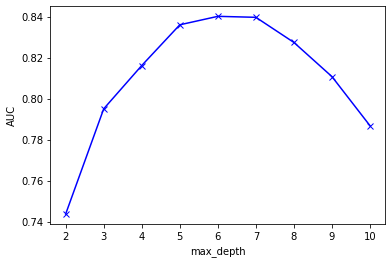

In [13]:
plt.plot(I, score_list, 'bx-')
plt.xlabel('max_depth')
plt.ylabel('AUC')
plt.show()

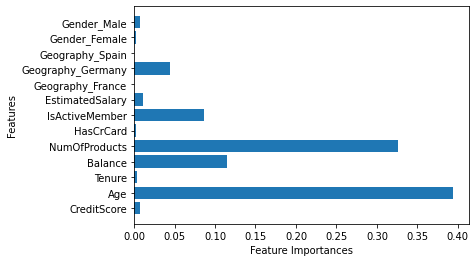

In [14]:
tree_6 = DecisionTreeClassifier(criterion='entropy', max_depth=6)
tree_6.fit(X_train, y_train)

plot_feature_importances(tree_6)